In [1]:
import pandas as pd
from poseidon.shiprsimagenet import ShipRSImageNet

In [2]:
dataset = ShipRSImageNet('ShipRSImageNet_V1')
train_set = dataset.get_image_set('train')

Get a list of all ship instances in the train set

In [3]:
train_objs = [ obj for image in train_set for obj in image.objects ]
len(train_objs)

10860

Determine how many ship instances are in each location, of those that do have their location annotated

In [4]:
pd.Series([ obj.location for obj in train_objs ]).value_counts()

nearland    8959
sea          859
crowd        432
land         340
41 LL         48
river         17
small          4
fog            1
glint          1
Name: count, dtype: int64

Determine how many images contain ships that are at sea. The images with these ships are our best candidates for using as backgrounds for our synthetic images, though some of these may still have shorelines that we would need to crop or mask out

In [5]:
at_sea_images = pd.unique([ obj.filename for obj in train_objs if obj.location == 'sea' ])
len(at_sea_images)

315

Preview some of the images to see what they look like

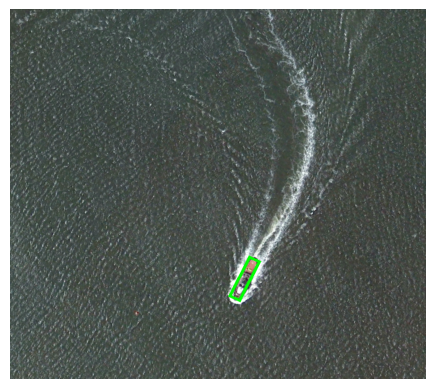

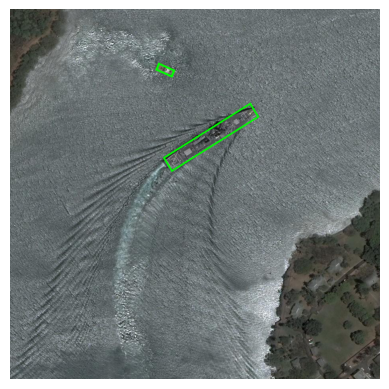

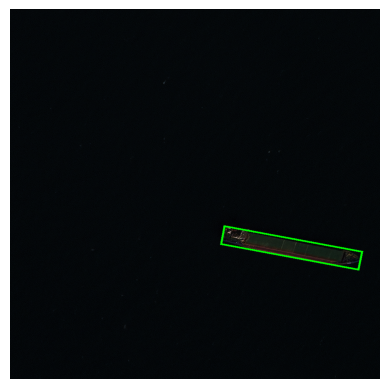

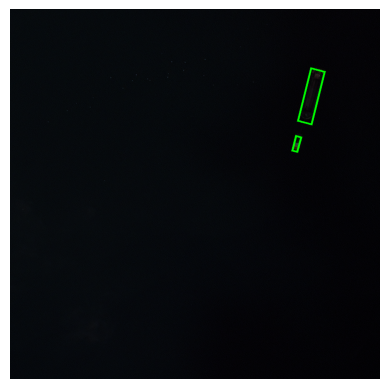

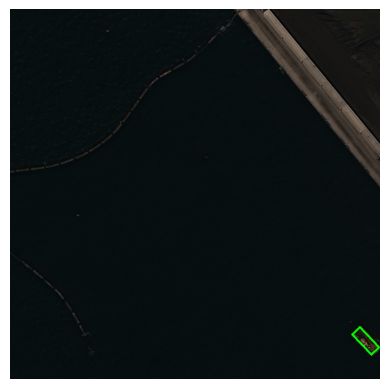

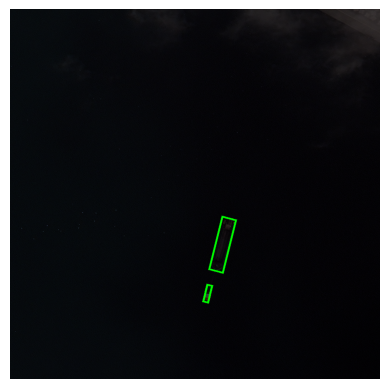

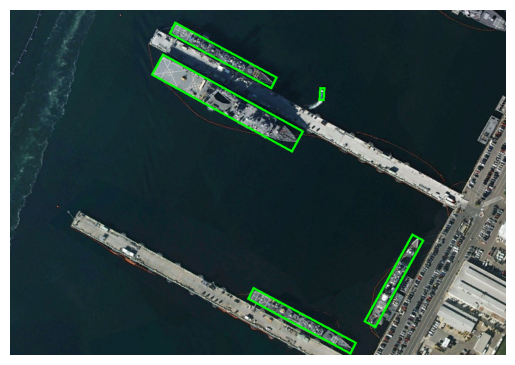

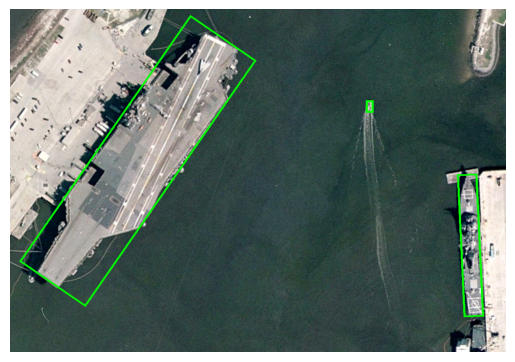

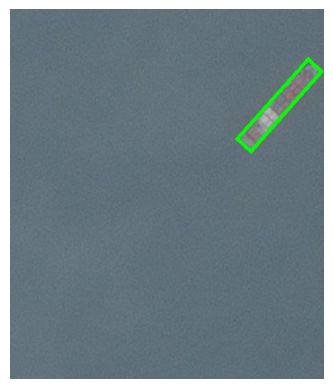

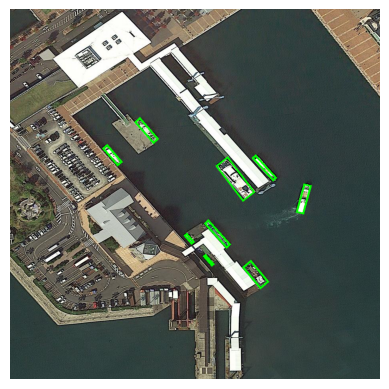

In [6]:
for at_sea_image in at_sea_images[:10]:
    image = dataset.get_image(at_sea_image)
    image.show()